In [1]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pickle


# f2 = open('data/split_0.80_0.10_0.10_aug_to_5000_down_sample_True_instance1/val_data', 'rb')
# f2 = open('data/split_0.80_0.10_0.10_aug_to_5000_down_sample_True_instance1/val_data', 'rb')
# X_sequence_val, X_feature_val, X_image_val, Y_val = pickle.load(f2)
# f2.close()
# f3 = open('data/split_0.80_0.10_0.10_aug_to_5000_down_sample_True_instance1/test_data', 'rb')
f3 = open('data/split_image_0.60_0.30_0.10_aug_to_1875_down_sample_True_instance0-9/test_data', 'rb')
X_sequence_test, X_feature_test, X_image_test, Y_test = pickle.load(f3)
# X_sequence_test, X_feature_test, Y_test = pickle.load(f3)
f3.close()
from keras_preprocessing.sequence import pad_sequences
X_sequence_test_paded = pad_sequences(X_sequence_test, dtype='float', padding='post', value = np.nan)
# X_sequence_val_paded = pad_sequences(X_sequence_val, dtype='float', padding='post', value = np.nan)
from util import preprocess
X_sequence_test_trimed = preprocess(X_sequence_test_paded)
# X_sequence_val_trimed = preprocess(X_sequence_val_paded)

def build_channel(data):
    X = []
    for image in data:
        X.append(image.reshape(128, 128, 1))
    return X
X_image_test = np.array(build_channel(X_image_test))
# X_image_val = np.array(build_channel(X_image_val))
X_feature_test = np.array(X_feature_test)
# X_feature_val = np.array(X_feature_val)
Y_test = np.array(Y_test)-1
# Y_val = np.array(Y_val)-1

2023-03-15 15:48:42.366041: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 15:48:42.475781: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
models = []
best_list_0=[18,8,10,13,10,16,8,16,12,11]
best_list_1=[17,25,16,10,4,25,22,13,21,10]
best_list_2=[11,10,11,7,14,10,16,9,21,11]
best_list_3=[10,26,13,16,15,16,13,12,11,21]
best_acc_list_before_image = [6,5,4,3,5,8,5,4,7,8]
min_loss_list_before_image = [6,6,4,8,7,8,5,6,5,8]
best_acc_list_after_image = [22, 10, 51, 76, 29, 51, 33, 96, 79, 5]
min_loss_list_after_image = [55, 30, 30, 57, 87, 29, 88, 96, 85, 67]
best_acc_list_only_image = [36, 51, 57, 78, 86, 98, 80, 43, 93, 57]
min_loss_list_only_image = [39, 87, 96, 81, 86, 90, 78, 96, 97, 95]
for i in range(0,10):
    # lodaed_model = keras.models.load_model('models/bagging_only_image_0.60_0.30_0.10/cnn_with_feature%d/model_%d'%(i, best_acc_list_only_image[i]),compile=False)
    lodaed_model = keras.models.load_model('models/bagging_before_image_0.60_0.30_0.10/rnn_with_feature%d/model_%d'%(i,best_acc_list_before_image[i]),compile=False)
    # lodaed_model = keras.models.load_model('models/bagging_after_image_0.60_0.30_0.10/mix_model%d/model_%d'%(i,best_acc_list_after_image[i]),compile=False)
    models.append(lodaed_model)

2023-03-15 15:49:10.397758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 15:49:11.427193: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22110 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:73:00.0, compute capability: 8.6
2023-03-15 15:49:11.428221: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22280 MB memory:  -> device: 1, name: GeForce RTX 3090, pci bus id: 0000:d5:00.0, compute capability: 8.6
2023-03-15 15:49:12.908734: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has

/home/zhkang/softwares/anaconda3/envs/DL/lib/python3.9/site-packages/keras/engine/functional.py:637: UserWarning: Input dict contained keys ['image'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2023-03-15 15:50:55.878800: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-15 15:50:56.073117: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


1/4 [======>.......................] - ETA: 9s

Could not load symbol cublasGetSmCountTarget from libcublas.so.11. Error: /home/zhkang/softwares/anaconda3/envs/DL/lib/python3.9/site-packages/tensorflow/python/../../../../libcublas.so.11: undefined symbol: cublasGetSmCountTarget


3/3 [==============================] - 3s 30ms/step
(11, 11)
balanced_acc: 0.85699490010104
Normalized confusion matrix
[[8.41942945e-01 3.85505012e-03 1.46491904e-02 9.17501928e-02
  2.31303007e-03 0.00000000e+00 5.39707016e-03 0.00000000e+00
  0.00000000e+00 4.00925212e-02 0.00000000e+00]
 [1.77777778e-03 8.25777778e-01 1.47555556e-01 8.88888889e-04
  8.88888889e-03 8.88888889e-04 7.11111111e-03 0.00000000e+00
  7.11111111e-03 0.00000000e+00 0.00000000e+00]
 [4.00000000e-02 1.00000000e-01 8.46666667e-01 1.33333333e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.56862745e-01 0.00000000e+00 0.00000000e+00 8.23529412e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.96078431e-02 0.00000000e+00]
 [1.06382979e-03 1.77304965e-04 1.77304965e-04 1.77304965e-04
  7.85815603e-01 4.21985816e-02 1.65780142e-01 8.86524823e-04
  5.31914894e-04 7.09219858e-04 2.48226950e-03]
 [0.00000000e+00 0.0

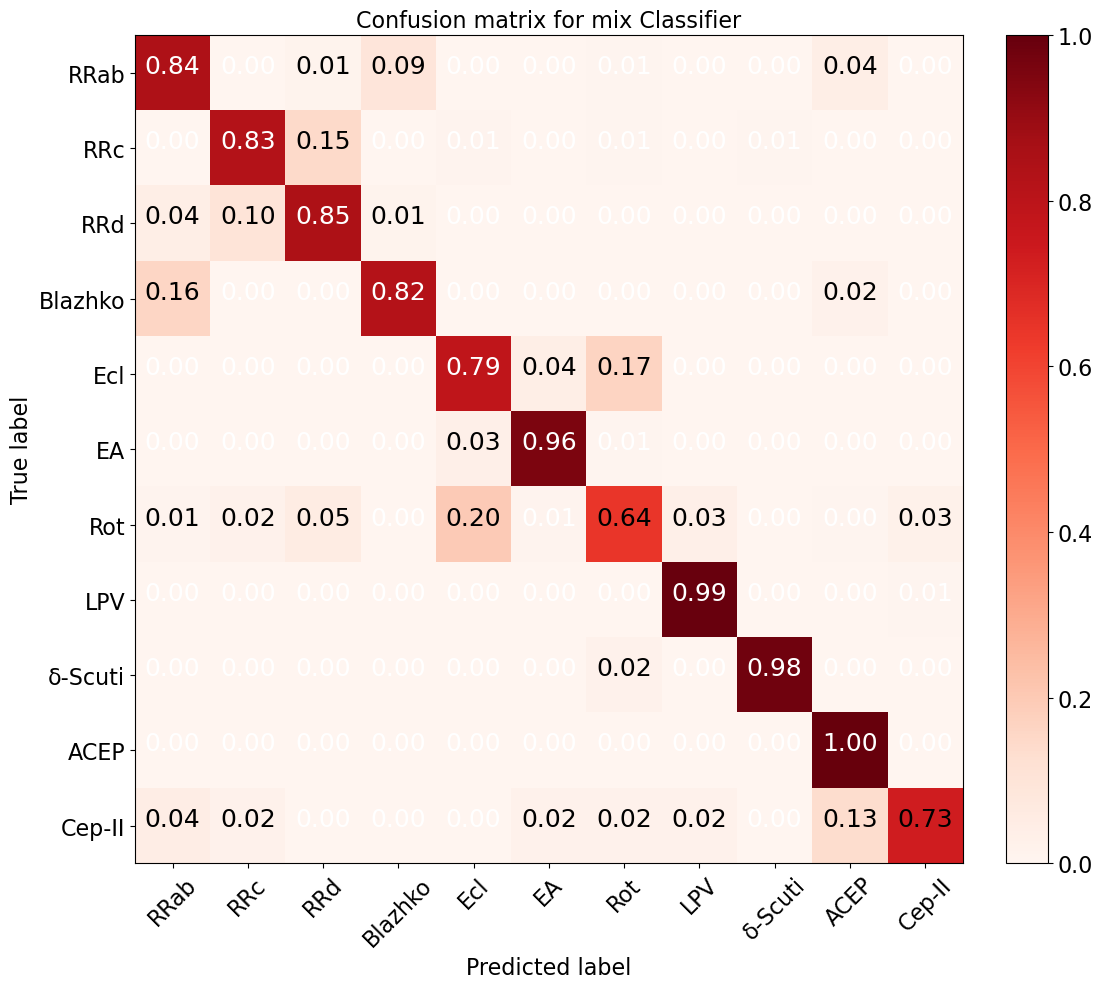

In [3]:

# def generate_batch(X_sequence, X_image,  X_feature, Y, batch_size):
# def generate_batch(X_sequence,  X_feature, Y, batch_size):
#     idx = 0
#     batch_num = len(Y)/batch_size
#     while idx < batch_num:
#         batch_x_sequence = X_sequence[idx * batch_size : (idx + 1) * batch_size]
#         batch_x_feature = X_feature[idx * batch_size : (idx + 1) * batch_size]
#         batch_y = Y[idx * batch_size : (idx + 1) * batch_size]
#         yield batch_x_sequence,  batch_x_feature, batch_y
#         idx += 1
from util import generate_batch
# test_gen = generate_batch(X_sequence_test_trimed, X_image_test, X_feature_test, Y_test, 128)      
test_gen = generate_batch(X_sequence_test_trimed, X_image_test, X_feature_test, Y_test, 128)      

y_label = Y_test

# val_gen = generate_batch(X_sequence_val_trimed, X_image_val, X_feature_val, Y_val, 128)      
# y_label = Y_val


y_predict = np.array([])
for x_sequence, x_image, x_feature, y in test_gen:
# for x_sequence,  x_feature, y in test_gen:
    results = []
    for model in models:
    # for i in (9,):
    #     model = models[i]
        results.append(model.predict({'sequence':x_sequence, 
                                        'image':x_image,
                                        'feature':x_feature}))
    average_result = np.sum(results, axis=0)
    y_predict = np.concatenate([y_predict, np.argmax(average_result, axis=-1)])
y_label = y_label.astype(np.int32) 
y_predict = y_predict.astype(np.int32) 
cm = confusion_matrix(y_true=y_label, y_pred=y_predict, normalize='true')
print(cm.shape)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(values_format='.2g')
balanced_acc = 0
for i in range(0,11):
    balanced_acc += cm[i][i]
balanced_acc = balanced_acc / 11
print('balanced_acc:',balanced_acc)

classes = ['RRab', 'RRc','RRd', 'Blazhko','Ecl', 'EA' , 'Rot', 'LPV','δ-Scuti','ACEP', 'Cep-II']

from util import cm_plot

plotting = cm_plot(cm, classes_types=classes, classifier_model='mix Classifier', nClasses=11,
                    cmap=plt.cm.Blues)

In [86]:
import itertools

def plot_2_confusion_matrixs(cm1,cm2, classes_types,
                          normalize=True,
                          title1='Confusion matrix',
                          title2='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] * 100
        cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis] * 100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    

    fig = plt.figure(figsize=(20,40))

    plt.subplot(121)
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title1, fontsize=16)
    cb=plt.colorbar(fraction=0.046, pad=0.04)
    cb.ax.tick_params(labelsize=16)
    tick_marks = np.arange(len(classes_types))
    plt.xticks(tick_marks, classes_types, rotation=45)
    plt.yticks(tick_marks, classes_types)
    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', labelsize=16)

    thresh = cm1.max() / 2.
    for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
        plt.text(j, i, "{:0.1f}".format(cm1[i, j]),
                 horizontalalignment="center",
                 color="white" if (cm1[i, j] < 0.01) or (cm1[i,j] >= 0.75)  else "black",fontsize=18)

    plt.ylabel('True label',fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)
    plt.tight_layout()

    plt.subplot(122)
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title2, fontsize=16)
    cb=plt.colorbar(fraction=0.046, pad=0.04)
    cb.ax.tick_params(labelsize=16)
    tick_marks = np.arange(len(classes_types))
    plt.xticks(tick_marks, classes_types, rotation=45)
    plt.yticks(tick_marks, classes_types)
    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', labelsize=16)

    thresh = cm2.max() / 2.
    for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
        plt.text(j, i, "{:0.1f}".format(cm2[i, j]),
                 horizontalalignment="center",
                 color="white" if (cm2[i, j] < 0.01) or (cm2[i,j] >= 0.75)  else "black",fontsize=18)

    plt.ylabel('True label',fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)
    plt.tight_layout()

    return fig

Normalized confusion matrix


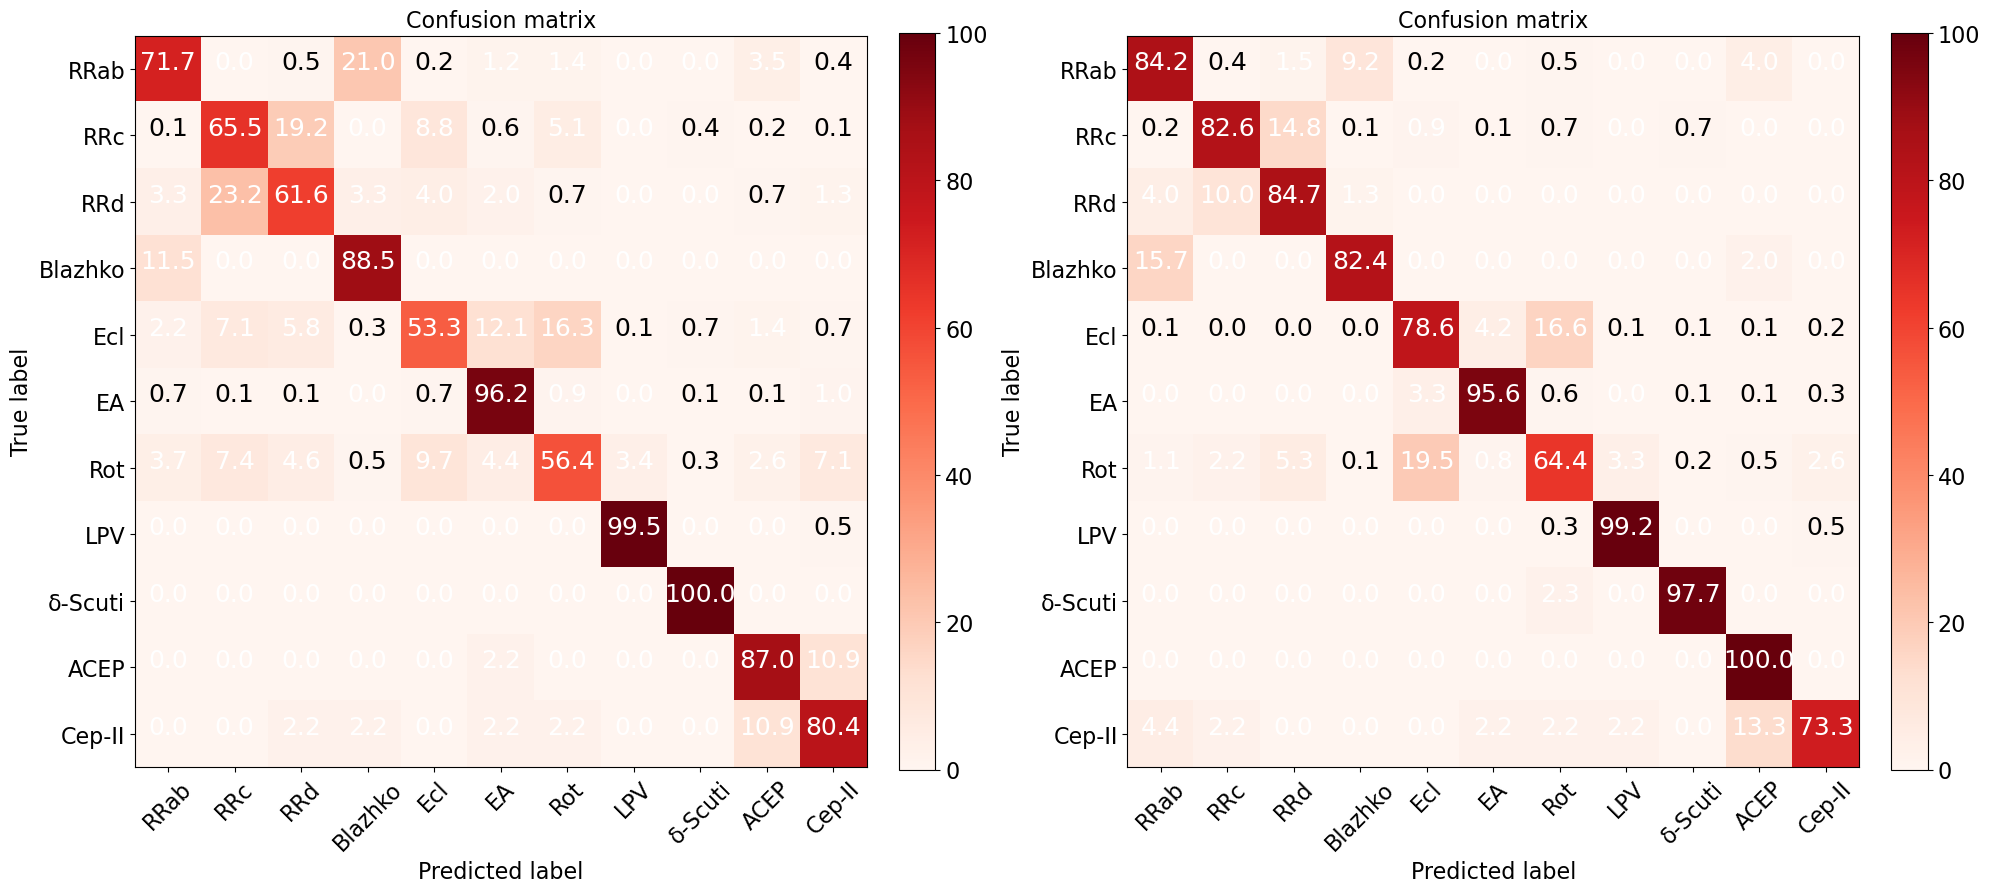

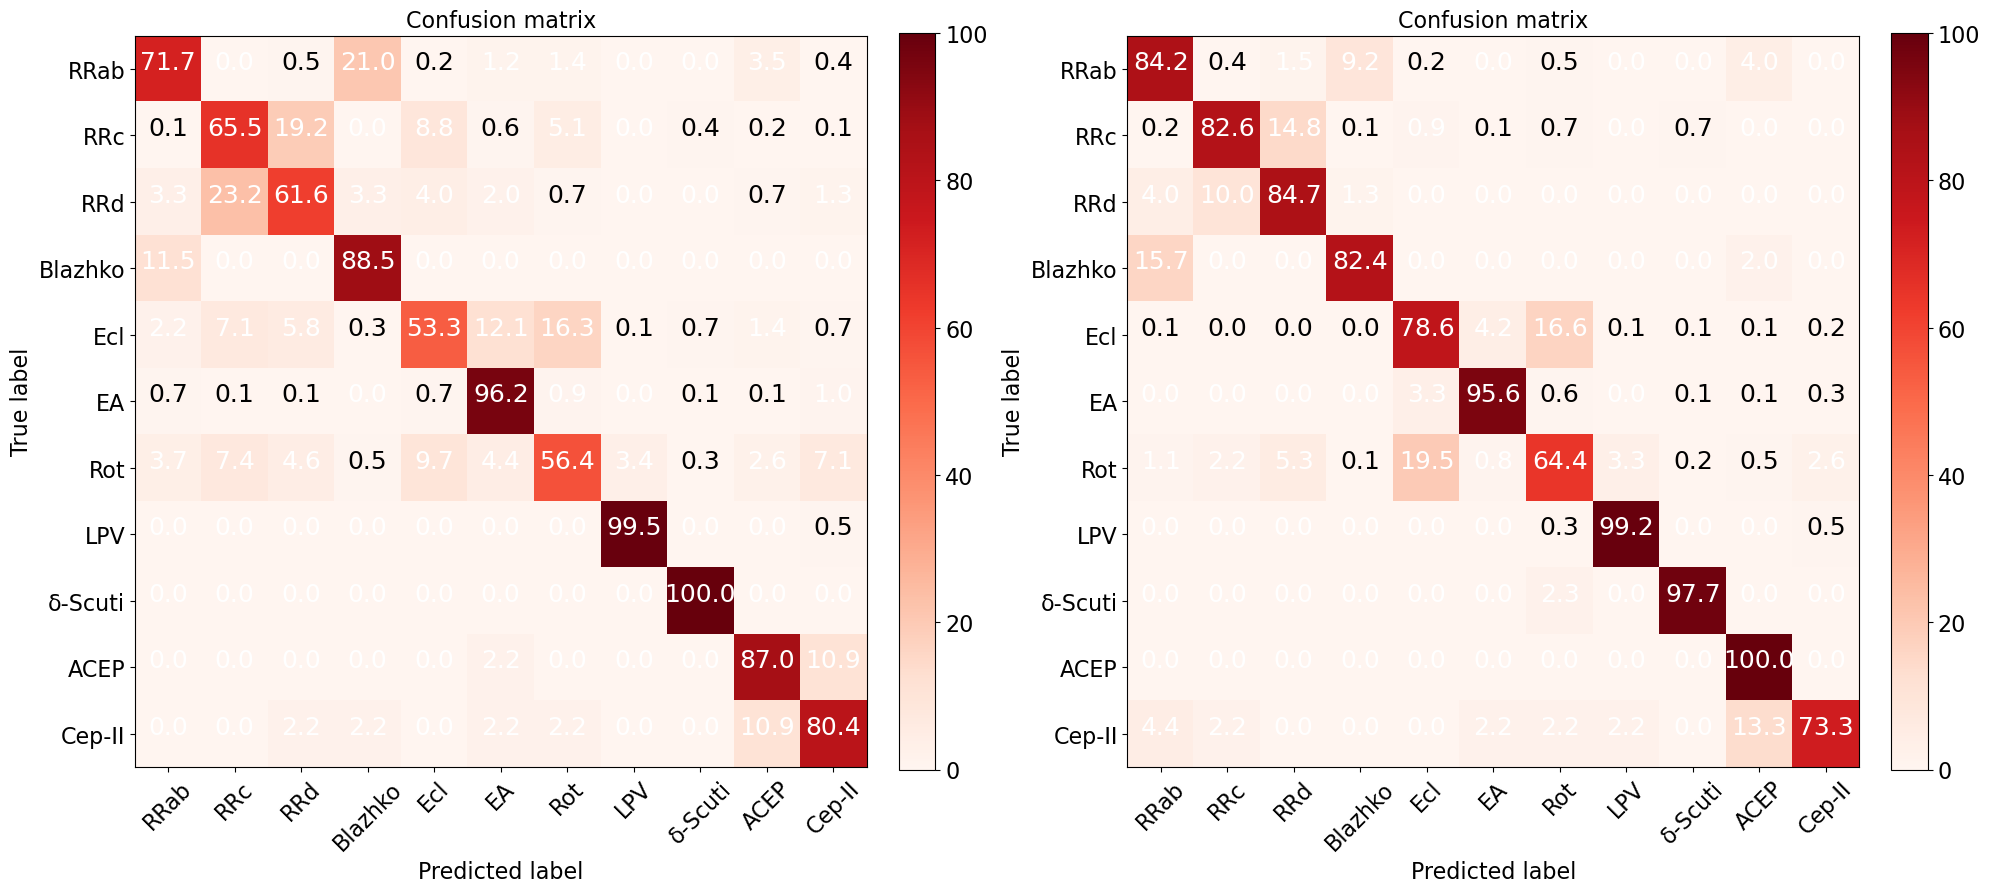

In [87]:
import pandas as pd
data = pd.read_csv("conf_mat.csv",header=None)
cm_spe = np.array(data).astype(np.float64)
plot_2_confusion_matrixs(cm_spe,cm, classes,
                          normalize=True,
                          title1='Confusion matrix',
                          title2='Confusion matrix',
                          cmap=plt.cm.Reds)

/home/zhkang/project_mixnn4vs/util.py:28: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Normalized confusion matrix
[[0.         0.         0.02105263 0.73684211 0.00526316 0.03157895
  0.06315789 0.         0.         0.13157895 0.01052632]
 [0.00253807 0.         0.5786802  0.         0.24619289 0.0177665
  0.12436548 0.         0.02030457 0.00507614 0.00507614]
 [0.08928571 0.60714286 0.         0.08928571 0.10714286 0.05357143
  0.         0.         0.         0.01785714 0.03571429]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.04518664 0.15085602 0.12096548 0.00505192 0.         0.26985686
  0.34591636 0.00140331 0.01459444 0.0305922  0.01557676]
 [0.21276596 0.         0.06382979 0.         0.19148936 0.
  0.17021277 0.         0.0212766  0.04255319 0.29787234]
 [0.08811475 0.16803279 0.10245902 0.0102459  0.2295082  0.09221311
  0.         0.08196721 0.00614754 0.05532787 0.16598361]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1

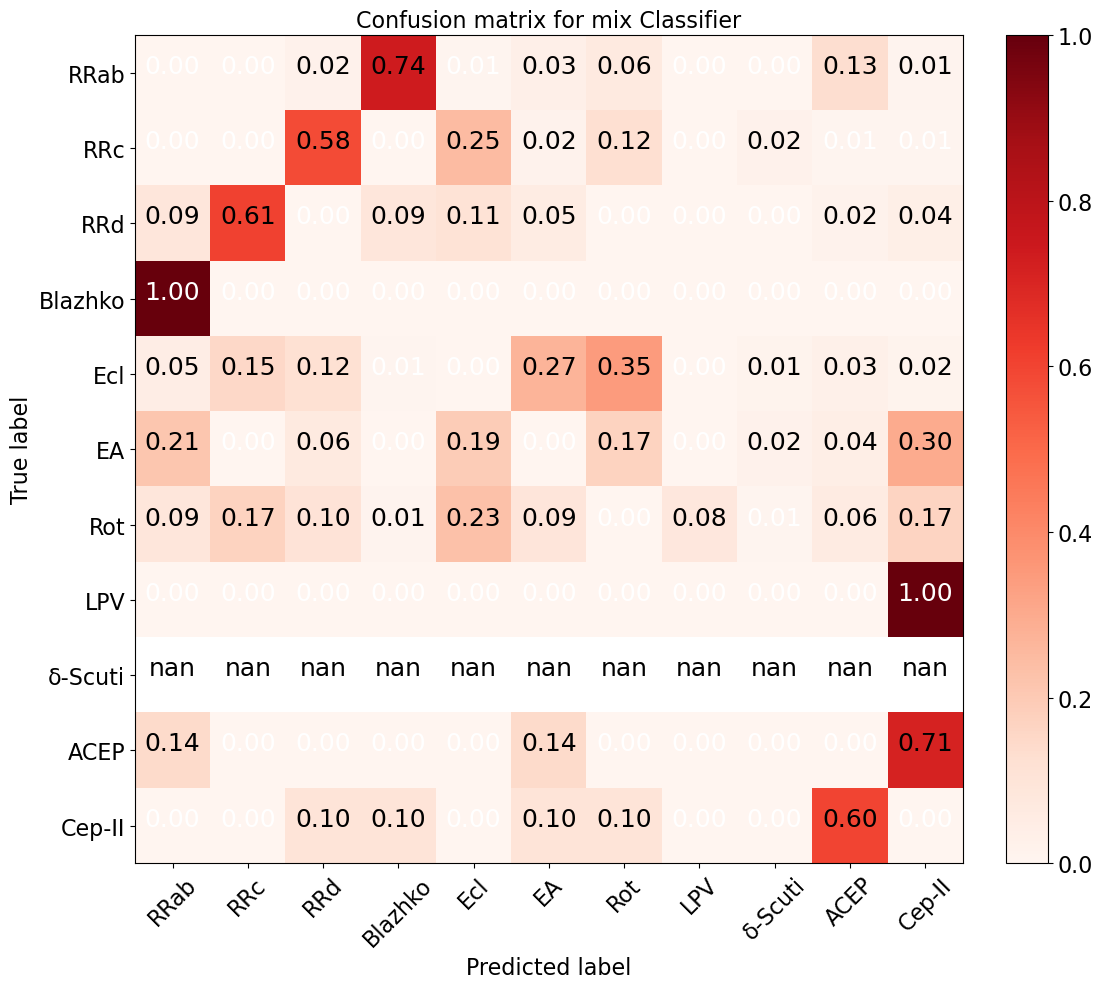

In [21]:
import pandas as pd
import numpy as np
SPE_data = pd.read_csv("Type_FL_1Misclassification_SPE.csv", sep=' ')

ture_label = np.array(SPE_data["True_class_labels"])-1
idx = np.where(ture_label==11)
ture_label[idx] = 10

pre_label = np.array(SPE_data["Prediction"])-1
idx = np.where(pre_label==11)
pre_label[idx] = 10

cm_SPE = confusion_matrix(y_true=ture_label, 
                          y_pred=pre_label, normalize='true')
                          # ,labels = [1,2,3,4,5,6,7,8,9,10,12])
classes = ['RRab', 'RRc','RRd', 'Blazhko','Ecl', 'EA' , 'Rot', 'LPV','δ-Scuti','ACEP', 'Cep-II']
plotting = cm_plot(cm_SPE, classes_types=classes, classifier_model='mix Classifier', nClasses=11,
                    cmap=plt.cm.Blues)


In [5]:
wrong_pre_index = []
right_pre_index = []
for i in range(0,len(y_predict)):
    if y_predict[i] != y_label[i]:
        wrong_pre_index.append(i)
    else:
        right_pre_index.append(i)

In [6]:
splited_wrong_pre_index = [[] for i in range(0,11)]
for index in wrong_pre_index:
    label = y_label[index]
    splited_wrong_pre_index[label].append(index)
splited_right_pre_index = [[] for i in range(0,11)]
for index in right_pre_index:
    label = y_label[index]
    splited_right_pre_index[label].append(index)

In [7]:
for i ,list in enumerate(splited_wrong_pre_index):
    print('%d, length:%d'%(i, len(list)))

0, length:205
1, length:196
2, length:23
3, length:9
4, length:1208
5, length:59
6, length:388
7, length:3
8, length:1
9, length:0
10, length:12


2104
y_label:3
y_predict:0
[0.54263    0.71079141]
period:0.542630,  amplitude:0.710791
1/1 [==============================] - 0s 30ms/step
model result:
[[0.77968234 0.02185127 0.03367399 0.04533277 0.00392207 0.00499551
  0.00470069 0.00438302 0.00156958 0.00676549 0.00221417]]


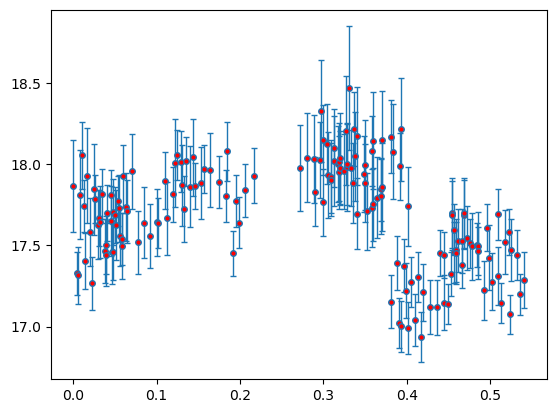

In [12]:

print(len(wrong_pre_index))
index = splited_wrong_pre_index[3][2]
# index = splited_right_pre_index[1][23]
print('y_label:%d'%y_label[index])
print('y_predict:%d'%y_predict[index])
x = X_sequence_test[index][:,0]
y = X_sequence_test[index][:,1]
err = X_sequence_test[index][:,2]
plt.errorbar(x,y,err, fmt='o',ms=4, mfc='r', elinewidth=1, capsize=2)
# plt.imshow(X_image_test[index])
print(X_feature_test[index])
print('period:%f,  amplitude:%f'%(X_feature_test[index][0], X_feature_test[index][1]))

results = []
for model in models:
    results.append(model.predict({'sequence':np.array([X_sequence_test_trimed[index]]), 
                                        'image':np.array([X_image_test[index]]),
                                        'feature':np.array([X_feature_test[index]])}))
average_result = np.sum(results, axis=0) / 11
print('model result:' )
print(average_result)